# Description:

* This notebook goes through the plotting of CRISPR loci

### Before running this notebook:

* __run the [Setup](./Setup.pynb) notebook__

# User-defined variables

In [62]:
# directory where you want the spacer blasting to be done
## CHANGE THIS!
workDir = "/home/nyoungb2/t/CLdb_Ecoli/loci_plots/"

# Init

In [63]:
import os
from IPython.display import Image

In [64]:
if not os.path.isdir(workDir):
    os.makedirs(workDir)

In [65]:
# checking that CLdb is in $PATH & ~/.CLdb config file is set up
!CLdb --config-params

#-- Config params --#
DATABASE = /home/nyoungb2/t/CLdb_Ecoli/CLdb.sqlite


# Plotting loci

* As with arrayBlast, `plotLoci` has subcommands of it's own

In [66]:
!CLdb -- plotLoci -h

Usage:
    plotLoci [options] subcommand -- [subcommand_options]

  Options:
    --list
        List all subcommands.

    --perldoc
        Get perldoc of subcommand.

    -v Verbose output
    -h This help message

  For more information:
    CLdb --perldoc -- plotLoci



In [67]:
!CLdb -- plotLoci --list

format_dna_segs_colors
make_comparison
make_dna_segs
make_xlims
order_by_tree
prune_tree
rotate_tree
run


## Basics on how a plot is made

* Note: some steps are optional (like mapping loci plots to a tree)

1. Make a table of spacer/DR sequence locations & other info.
  * A 'dna_segs' table
1. [optional] order the table by a tree file
1. [optional] add color info to the table
1. Make a table of the range limits for each locus.
  * ie., the start & stop positions of each plot
  * An 'xlims' table
1. [optional] order the table by a tree file.
1. Make a comparison file to compare sequence similarity among loci.
  * A 'compare' table
1. Feed all of the tables into an R script for making the figure.

# Making the plot

## dna_segs table

In [68]:
# making table
!cd $workDir; \
    CLdb -- plotLoci -- make_dna_segs > dna_segs.txt
    
# checking output
!cd $workDir; \
    echo; \
    head -n 5 dna_segs.txt

...Found multiple loci for 1 or more taxa. Adding loci_ids to names in dna_segs table!

name	start	end	strand	col	lty	lwd	pch	cex	gene_type	taxon_name	locus_id	feat	feat_id	subtype	dna_segs_id
12	2876425	2876457	1	29	1	0.5	8	1	blocks	Escherichia_coli_K-12_MG1655	A	spacer	12	I-E	Escherichia_coli_K-12_MG1655__A
7	2876118	2876150	1	31	1	0.5	8	1	blocks	Escherichia_coli_K-12_MG1655	A	spacer	7	I-E	Escherichia_coli_K-12_MG1655__A
11	2876364	2876396	1	24	1	0.5	8	1	blocks	Escherichia_coli_K-12_MG1655	A	spacer	11	I-E	Escherichia_coli_K-12_MG1655__A
9	2876241	2876274	1	3	1	0.5	8	1	blocks	Escherichia_coli_K-12_MG1655	A	spacer	9	I-E	Escherichia_coli_K-12_MG1655__A


### Adding coloring info

In [84]:
# making table
!cd $workDir; \
    CLdb -- plotLoci -- format_dna_segs_colors < dna_segs.txt > dna_segs_col.txt
    
# checking output
!cd $workDir; \
    echo; \
    head -n 5 dna_segs_col.txt


name	start	end	strand	col	lty	lwd	pch	cex	gene_type	taxon_name	locus_id	feat	feat_id	subtype	dna_segs_id
1	2875723	2875752	1	#000000	1	0.1	8	1	blocks	Escherichia_coli_K-12_MG1655	A	directrepeat	1	I-E	Escherichia_coli_K-12_MG1655__A
13	2876457	2876486	1	#000000	1	0.1	8	1	blocks	Escherichia_coli_K-12_MG1655	A	directrepeat	13	I-E	Escherichia_coli_K-12_MG1655__A
4	2875906	2875935	1	#000000	1	0.1	8	1	blocks	Escherichia_coli_K-12_MG1655	A	directrepeat	4	I-E	Escherichia_coli_K-12_MG1655__A
2	2875784	2875813	1	#000000	1	0.1	8	1	blocks	Escherichia_coli_K-12_MG1655	A	directrepeat	2	I-E	Escherichia_coli_K-12_MG1655__A


## xlims table

In [69]:
# making table
!cd $workDir; \
    CLdb -- plotLoci -- make_xlims > xlims.txt
    
# checking output
!cd $workDir; \
    echo; \
    head -n 5 xlims.txt

...Found multiple loci for 1 or more taxa. Adding leaves to the tree! Adding loci_ids to leaves & xlims table!

start	end	taxon_name	locus_id	subtype	dna_segs_id
3665521	3691424	Escherichia_coli_O157_H7	G	I-E	Escherichia_coli_O157_H7__G
3665829	3691513	Escherichia_coli_O157_H7	H	I-E	Escherichia_coli_O157_H7__H
2880811	2903063	Escherichia_coli_K-12_W3110	F	I-E	Escherichia_coli_K-12_W3110__F
2876357	2885875	Escherichia_coli_K-12_W3110	E	I-E	Escherichia_coli_K-12_W3110__E


In [85]:
# making table
!cd $workDir; \
    CLdb -- plotLoci -- make_comparison < dna_segs_col.txt

### Getting spacer clusters ###
start1	end1	start2	end2	col	dna_segs_id1	dna_segs_id2	feat	feat_id	sfeat_id


## making figure

In [86]:
!cd $workDir; \
    CLdb -- plotLoci -- run \
    -d dna_segs_col.txt \
    -x xlims.txt \
    -f png \
    -o all_loci

Loci plot written: "all_loci"
null device 
          1 


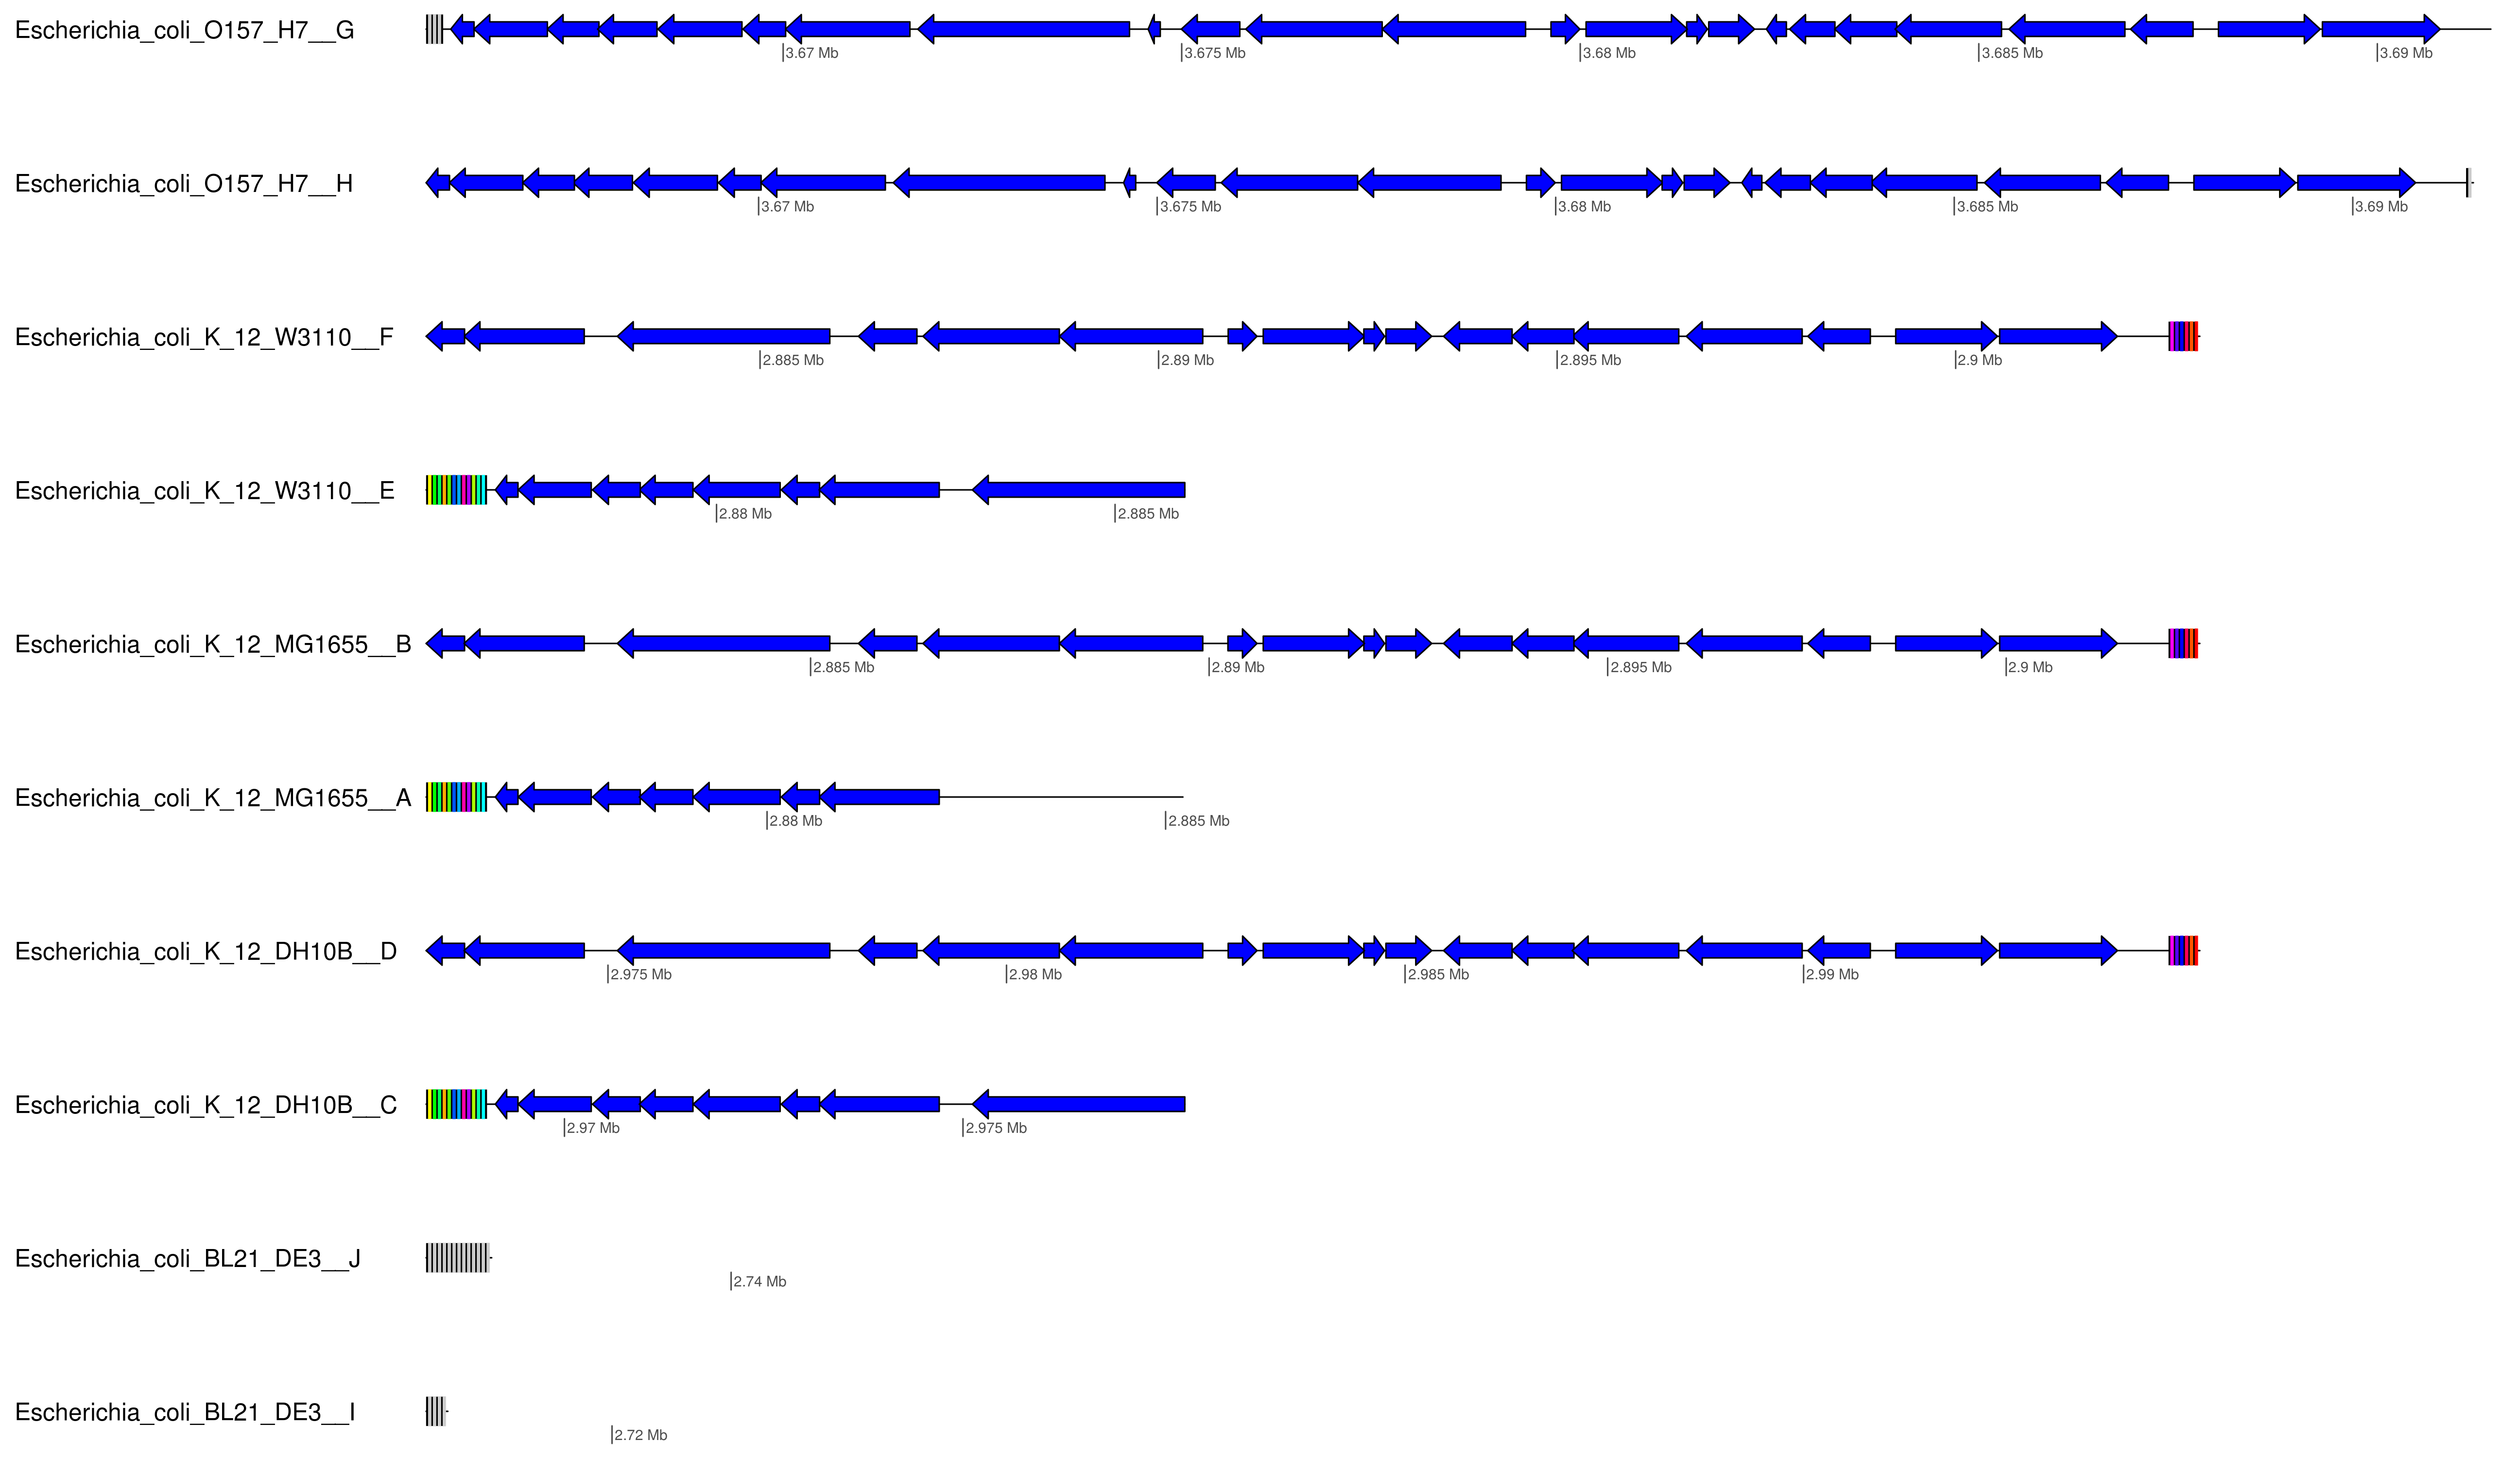

In [87]:
pngFile = os.path.join(workDir, 'all_loci.png')
Image(filename=pngFile)

#### Notes:

* For some CRISPRs, many non-CAS genes are intervieing between the CRISPR array and CAS genes.
* Genes could be colored by annotation or gene cluster.
* Comparisons could be shown between spacers, genes, or both.